In [11]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [14]:
import os 
import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
mother_path = 'drive/MyDrive/Find/Train'
folders=os.listdir(mother_path)
x = []
y = []
for i in folders:
  if 'JAY' in i:
    label = 0 # spill X
  elif 'ALEX' in i :
    label = 1 # spill
  elif 'DEREK' in i:
    label=2
  else:
    label=3
  files=glob.glob(os.path.join(mother_path,i)+'/*')
  for i,file in enumerate(files):
    if i % 20 == 0:
      print(i,'/',len(files))
    im = Image.open(file)
    im=im.resize((200,200))
    im = im.convert('RGB')
    data = np.asarray(im)
    x.append(data)
    y.append(label)
x = np.array(x)

y = np.array(y)

x = x.astype('float32')/ 255
y = y.astype('int')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
y_train = to_categorical(y_train,num_classes=4)
y_test = to_categorical(y_test,num_classes=4)
#######preprocessing###############


  

0 / 306
20 / 306
40 / 306
60 / 306
80 / 306
100 / 306
120 / 306
140 / 306
160 / 306
180 / 306
200 / 306
220 / 306
240 / 306
260 / 306
280 / 306
300 / 306
0 / 350
20 / 350
40 / 350
60 / 350
80 / 350
100 / 350
120 / 350
140 / 350
160 / 350
180 / 350
200 / 350
220 / 350
240 / 350
260 / 350
280 / 350
300 / 350
320 / 350
340 / 350
0 / 366
20 / 366
40 / 366
60 / 366
80 / 366
100 / 366
120 / 366
140 / 366
160 / 366
180 / 366
200 / 366
220 / 366
240 / 366
260 / 366
280 / 366
300 / 366
320 / 366
340 / 366
360 / 366
0 / 289
20 / 289
40 / 289
60 / 289
80 / 289
100 / 289
120 / 289
140 / 289
160 / 289
180 / 289
200 / 289
220 / 289
240 / 289
260 / 289
280 / 289


In [15]:
x_train.shape
x_test.shape

(394, 200, 200, 3)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(200,200,3))
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x =  tf.keras.layers.Dropout(0.2)(x)
y =  tf.keras.layers.Dense(4,activation='softmax')(x)
history_1 = model_final = Model(inputs = model.input, outputs = y)
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
history_1 = model_final.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
29/29 [==============================] - 51s 613ms/step - loss: 1.3672 - accuracy: 0.7754 - val_loss: 5.1889 - val_accuracy: 0.3223
Epoch 2/10
29/29 [==============================] - 15s 524ms/step - loss: 0.1040 - accuracy: 0.9695 - val_loss: 4.9925 - val_accuracy: 0.3401
Epoch 3/10
29/29 [==============================] - 15s 522ms/step - loss: 0.0897 - accuracy: 0.9716 - val_loss: 3.6773 - val_accuracy: 0.6675
Epoch 4/10
29/29 [==============================] - 15s 516ms/step - loss: 0.0793 - accuracy: 0.9771 - val_loss: 45.5710 - val_accuracy: 0.4924
Epoch 5/10
29/29 [==============================] - 15s 517ms/step - loss: 0.3532 - accuracy: 0.9411 - val_loss: 226.0558 - val_accuracy: 0.2310
Epoch 6/10
29/29 [==============================] - 15s 517ms/step - loss: 0.1060 - accuracy: 0.9662 - val_loss: 43.6722 - val_accuracy: 0.4975
Epoch 7/10
29/29 [==============================] - 15s 516ms/step - loss: 0.1212 - accuracy: 0.9760 - val_loss: 1.3505 - val_accuracy: 0.

The prediction for the 1st data is : [[0 3 0 ... 0 1 0]
 [0 2 0 ... 0 1 0]
 [0 2 0 ... 0 1 0]
 [0 2 0 ... 0 1 0]]


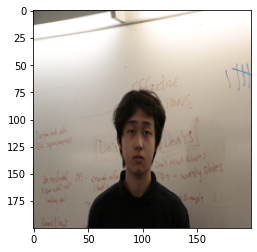

In [36]:
import matplotlib.pyplot as plt
pdtx=model.predict(x_test)
classx=np.argmax(pdtx,axis=1)
plt.imshow(x_test[1].reshape(200,200,3))
print("The prediction for the 1st data is :", classx[1])
#plt.imshow(testX[11].reshape(28,28))

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Find/Test',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Find/Test',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')
history = model_final.fit(
        train_generator,
        steps_per_epoch=20,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=20)

Found 267 images belonging to 4 classes.
Found 267 images belonging to 4 classes.
Epoch 1/10
 8/20 [===========>..................] - ETA: 6s - loss: 2.0324e-04 - accuracy: 1.0000

KeyboardInterrupt: ignored

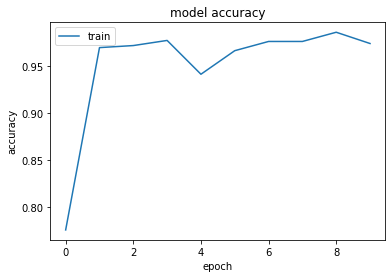

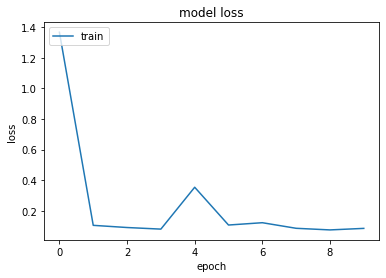

In [25]:

plt.plot(history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()